In [1]:
# Part One: Importing Required Libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn


In [44]:
# Data Gathering & Cleaning

# Load yield data
df_yield = pd.read_csv('dataset/yield.csv')
df_yield.shape

(56717, 12)

In [45]:
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

In [47]:
# rename columns value to hg/ha_yield
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  hg/ha_yield  
0  Maize       1961  1961  hg/ha        14000  
1  Maize       1962  1962  hg/ha        14000  
2  Maize       1963  1963  hg/ha        14260  
3  Maize       1964  1964  hg/ha        14257  
4  Maize       1965  1965  hg/ha        14400

In [48]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

Area   Item  Year  hg/ha_yield
0  Afghanistan  Maize  1961        14000
1  Afghanistan  Maize  1962        14000
2  Afghanistan  Maize  1963        14260
3  Afghanistan  Maize  1964        14257
4  Afghanistan  Maize  1965        14400

In [49]:
df_yield.describe()

Year     hg/ha_yield
count  56717.000000    56717.000000
mean    1989.669570    62094.660084
std       16.133198    67835.932856
min     1961.000000        0.000000
25%     1976.000000    15680.000000
50%     1991.000000    36744.000000
75%     2004.000000    86213.000000
max     2016.000000  1000000.000000

In [46]:
# Load and clean rainfall data
df_rain = pd.read_csv('dataset/rainfall.csv')
df_rain = df_rain.rename(columns={" Area": 'Area'})
df_rain['average_rain_fall_mm_per_year'] = df_rain['average_rain_fall_mm_per_year'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_rain = df_rain.dropna()

In [50]:
df_rain.head()

Area  Year  average_rain_fall_mm_per_year
0  Afghanistan  1985                          327.0
1  Afghanistan  1986                          327.0
2  Afghanistan  1987                          327.0
3  Afghanistan  1989                          327.0
4  Afghanistan  1990                          327.0

In [51]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5947 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5947 non-null   object 
 1   Year                           5947 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 185.8+ KB


In [52]:
# Merge yield and rainfall data
yield_df = pd.merge(df_yield, df_rain, on=['Year', 'Area'])

In [53]:
# Load and clean pesticides data
df_pes = pd.read_csv('dataset/pesticides.csv')
df_pes = df_pes.rename(columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element', 'Domain', 'Unit', 'Item'], axis=1)

In [54]:
df_pes.head()

Area  Year  pesticides_tonnes
0  Albania  1990              121.0
1  Albania  1991              121.0
2  Albania  1992              121.0
3  Albania  1993              121.0
4  Albania  1994              201.0

In [13]:
# Merge pesticides data with yield dataframe
yield_df = pd.merge(yield_df, df_pes, on=['Year', 'Area'])

In [55]:
# Load and clean temperature data
avg_temp = pd.read_csv('dataset/temp.csv')
avg_temp = avg_temp.rename(columns={"year": "Year", "country": 'Area'})

In [56]:
# Merge temperature data with yield dataframe
yield_df = pd.merge(yield_df, avg_temp, on=['Area', 'Year'])

In [57]:
yield_df.groupby('Item').count()

Area  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
Item                                                                           
Cassava               3742  3742         3742                           3742   
Maize                 6163  6163         6163                           6163   
Plantains and others  1014  1014         1014                           1014   
Potatoes              6287  6287         6287                           6287   
Rice, paddy           5308  5308         5308                           5308   
Sorghum               4810  4810         4810                           4810   
Soybeans              5009  5009         5009                           5009   
Sweet potatoes        4730  4730         4730                           4730   
Wheat                 5749  5749         5749                           5749   
Yams                  1308  1308         1308                           1308   

                      avg_temp  
Item                            
Cassava                   3742  
Maize                     6163  
Plantains and others      1014  
Potatoes                  6287  
Rice, paddy               5308  
Sorghum                   4810  
Soybeans                  5009  
Sweet potatoes            4730  
Wheat                     5749  
Yams                      1308

In [58]:
yield_df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  44120.000000   44120.000000                   44120.000000   
mean    1999.450204   74714.030394                    1095.052765   
std        8.341988   77832.434062                     685.112576   
min     1985.000000      50.000000                      51.000000   
25%     1993.000000   19873.000000                     645.000000   
50%     1999.000000   42537.500000                     854.000000   
75%     2007.000000  107153.500000                    1537.000000   
max     2013.000000  501412.000000                    3240.000000   

           avg_temp  
count  44120.000000  
mean      19.789336  
std        6.794232  
min       -3.590000  
25%       15.510000  
50%       20.715000  
75%       26.120000  
max       30.650000

In [59]:
yield_df['Area'].nunique()

116

In [61]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Area
China             635367180
India             369935808
Brazil            190901953
Mexico            148269560
Japan             145106412
Australia         122434104
Pakistan           84413151
Nigeria            79580480
Indonesia          78689262
United Kingdom     63988935
Turkey             59051400
Spain              53717583
South Africa       46086492
Germany            43716645
Canada             43498866
Egypt              42308042
Philippines        40540548
Argentina          37494270
Italy              37446012
Colombia           30836034
Name: hg/ha_yield, dtype: int64

In [62]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Item            Area          
Sweet potatoes  China             179797610
Cassava         India             159045238
                China             142181030
Potatoes        China             126543478
                India             104975222
Rice, paddy     China              56184456
Potatoes        Brazil             55186318
                United Kingdom     53972885
                Australia          52163796
Sweet potatoes  India              51688450
Potatoes        Japan              50172360
                Mexico             46523864
Maize           China              44925390
Sweet potatoes  Mexico             41259536
Cassava         Brazil             39121786
Sweet potatoes  Australia          38689578
                Japan              38294634
Potatoes        Pakistan           36542484
Wheat           China              35958774
Sorghum         China              34767924
Name: hg/ha_yield, dtype: int64

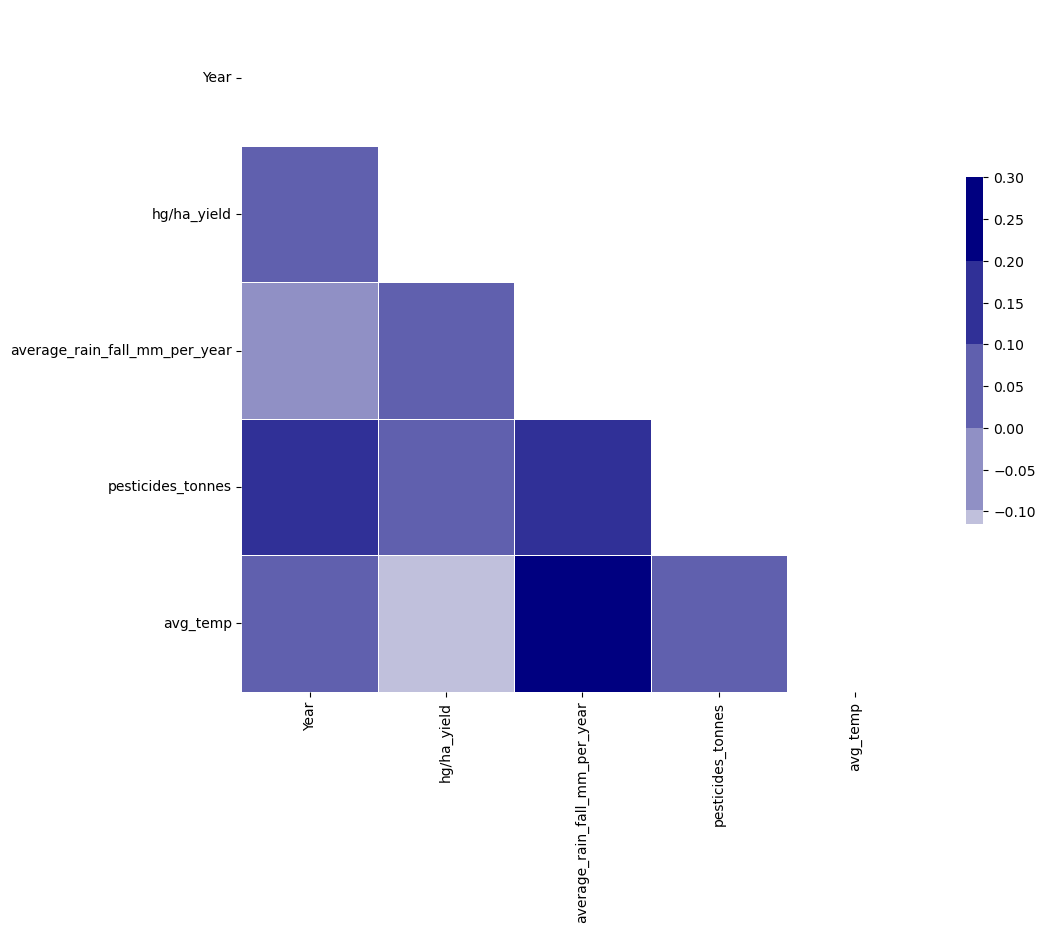

In [21]:
corr_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.light_palette("navy")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [22]:
# Encoding Categorical Variables
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area', "Item"], prefix=['Country', "Item"])

In [23]:
# Split features and label
features = yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label = yield_df['hg/ha_yield']

In [24]:
# Drop 'Year' column and scale features
features = features.drop(['Year'], axis=1)
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [63]:
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)


In [27]:
#  Model Comparison & Selection

def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(train_data, train_labels)
    y_pred = fit.predict(test_data)
    r2 = r2_score(test_labels, y_pred)
    return([model_name, r2])

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(gamma='auto'),
    DecisionTreeRegressor()
]

model_train = list(map(compare_models, models))
print(*model_train, sep="\n")

['GradientBoostingRegressor', 0.8965768919264416]
['RandomForestRegressor', 0.6842532317855172]
['SVR', -0.20353376480360752]
['DecisionTreeRegressor', 0.9599331173893159]


In [28]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [29]:
yield_df_onehot.head()

hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0        36613                         1485.0              121.0     16.37   
1        66667                         1485.0              121.0     16.37   
2        23333                         1485.0              121.0     16.37   
3        12500                         1485.0              121.0     16.37   
4         7000                         1485.0              121.0     16.37   

   Country_Albania  Country_Algeria  Country_Angola  Country_Argentina  \
0             True            False           False              False   
1             True            False           False              False   
2             True            False           False              False   
3             True            False           False              False   
4             True            False           False              False   

   Country_Armenia  Country_Australia  ...  Item_Cassava  Item_Maize  \
0            False              False  ...         False        True   
1            False              False  ...         False       False   
2            False              False  ...         False       False   
3            False              False  ...         False       False   
4            False              False  ...         False       False   

   Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  Item_Sorghum  \
0                      False          False             False         False   
1                      False           True             False         False   
2                      False          False              True         False   
3                      False          False             False          True   
4                      False          False             False         False   

   Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
0          False                False       False      False  
1          False                False       False      False  
2          False                False       False      False  
3          False                False       False      False  
4           True                False       False      False  

[5 rows x 115 columns]

In [64]:
# Select and train the final model
clf = DecisionTreeRegressor()
model = clf.fit(train_data, train_labels)

# Prepare test data for prediction
test_df = pd.DataFrame(test_data, columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns)



In [65]:
# Extract country and item from one-hot encoded columns
cntry = test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack() > 0]
cntrylist = list(pd.DataFrame(cntry).index.get_level_values(1))
countries = [i.split("_")[1] for i in cntrylist]

itm = test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack() > 0]
itmlist = list(pd.DataFrame(itm).index.get_level_values(1))
items = [i.split("_")[1] for i in itmlist]

test_df.drop([col for col in test_df.columns if 'Item' in col], axis=1, inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col], axis=1, inplace=True)
test_df['Country'] = countries
test_df['Item'] = items

In [66]:
# Predict and compare actual vs. predicted yields
test_df["yield_predicted"] = model.predict(test_data)
test_df["yield_actual"] = pd.DataFrame(test_labels)["hg/ha_yield"].tolist()

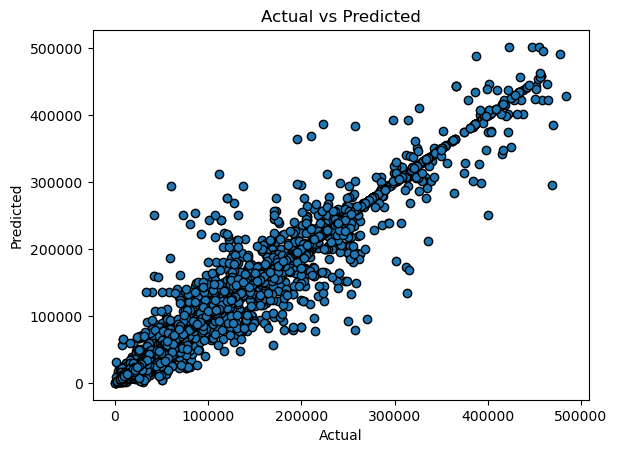

In [67]:
# Visualize actual vs predicted
fig, ax = plt.subplots()
ax.scatter(test_df["yield_actual"], test_df["yield_predicted"], edgecolors=(0, 0, 0))
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

<Axes: xlabel='importances', ylabel='names'>

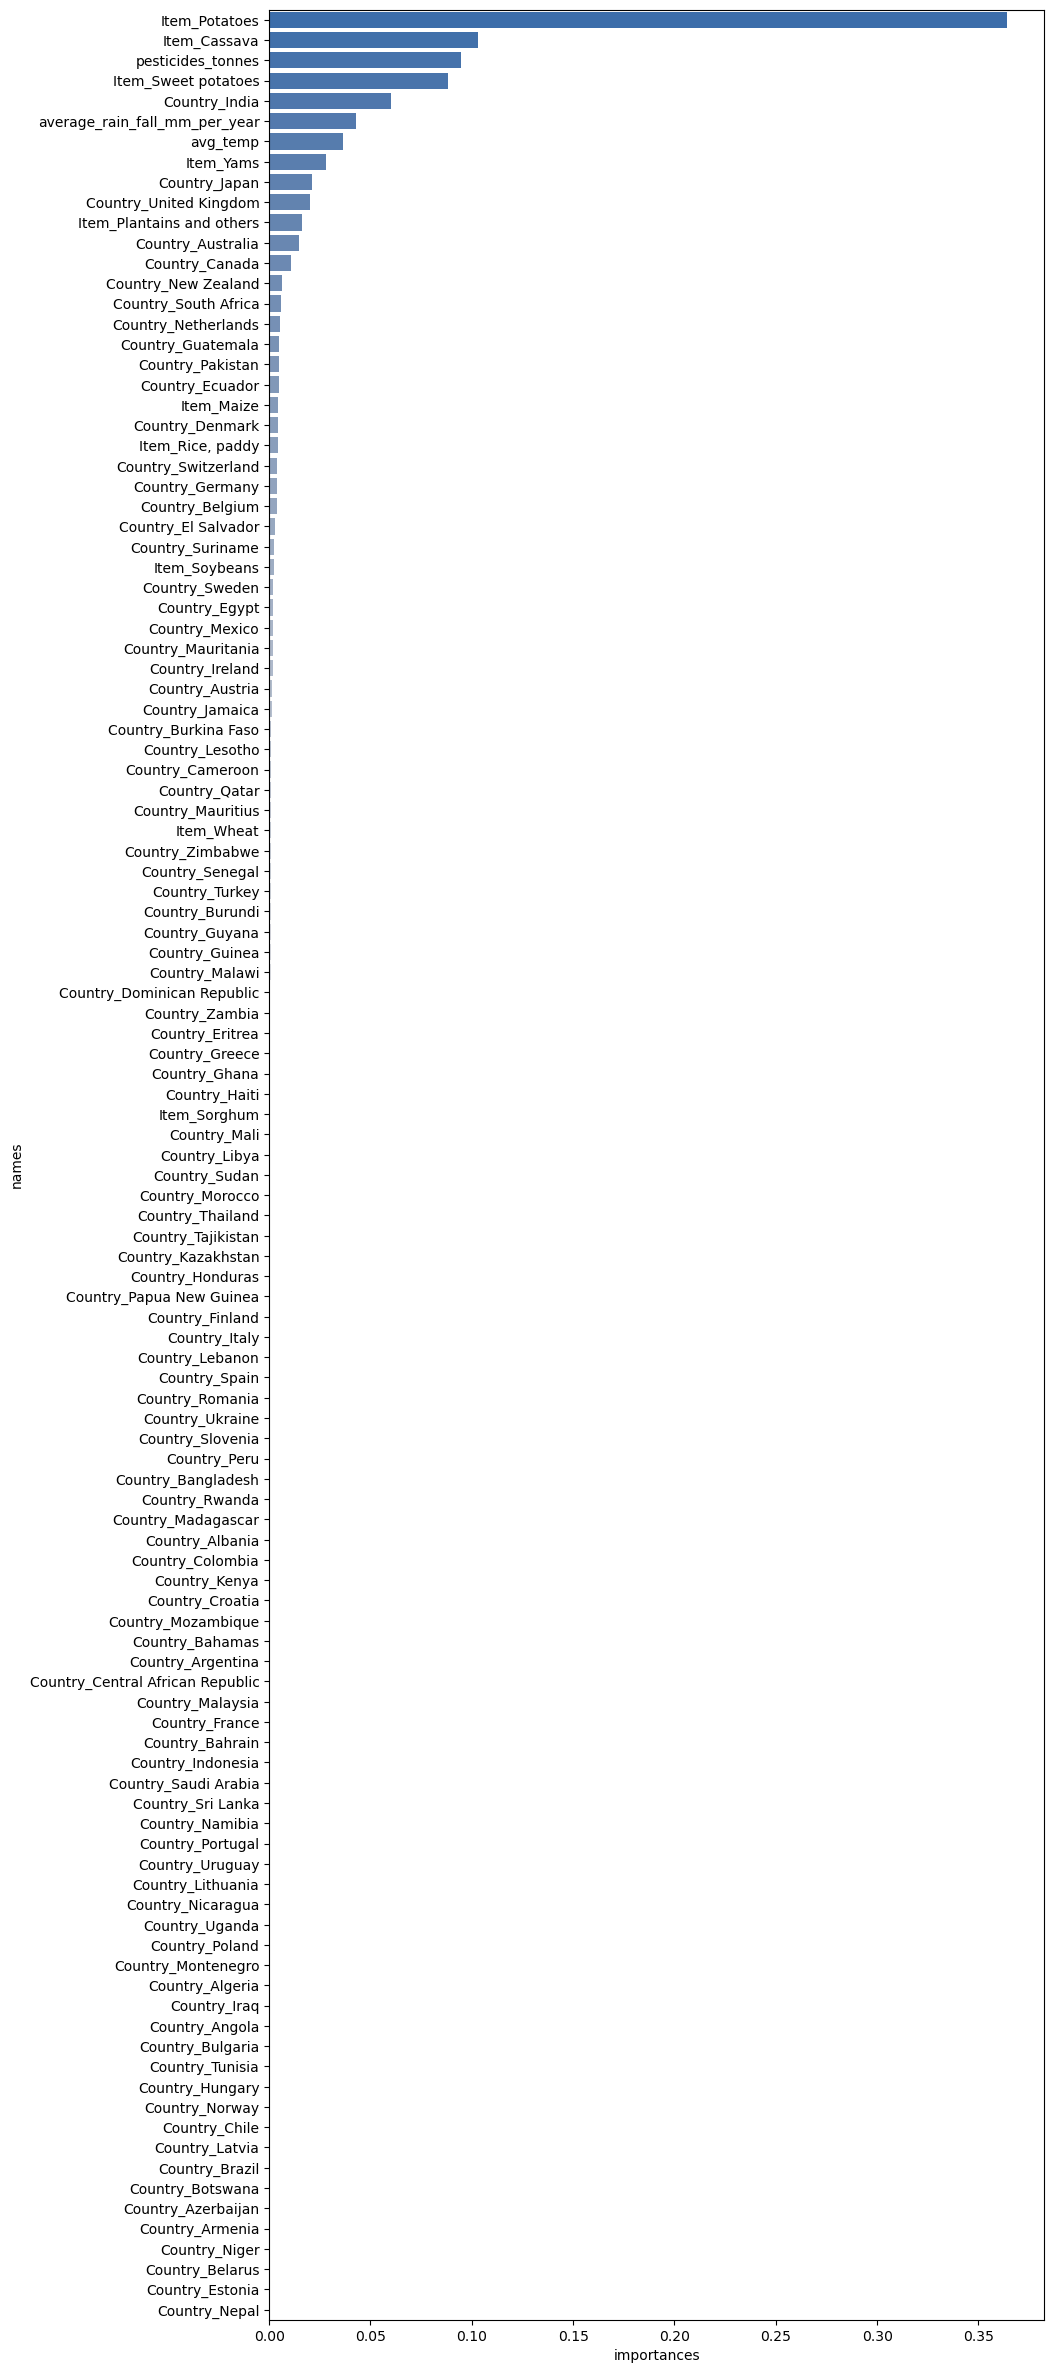

In [68]:
# Feature importance visualization
varimp = {'importances': model.feature_importances_, 'names': yield_df_onehot.columns[yield_df_onehot.columns != "hg/ha_yield"]}

fig, ax = plt.subplots(figsize=(10, 30))
df = pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False, by=["importances"], inplace=True)
df.dropna(inplace=True)
sns.barplot(x="importances", y="names", palette="vlag", data=df, orient="h", ax=ax)

In [83]:
# Save the model and scaler
filename = 'model/yield_model.sav'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [82]:
def predict_yield(country, item, year, avg_rainfall, avg_temp, pesticides_tonnes):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Country': [country],
        'Item': [item],
        'Avg_Rainfall': [avg_rainfall],
        'Avg_Temperature': [avg_temp],
        'Pesticides_Tonnes': [pesticides_tonnes]
    })
    
    # One-hot encode 'Country' and 'Item'
    input_data = pd.get_dummies(input_data, columns=['Country', 'Item'])
    
    # Create a DataFrame with all possible columns
    all_columns = yield_df_onehot.columns
    input_data = input_data.reindex(columns=all_columns, fill_value=0)
    
    # Drop 'Year' column if it exists (ensure no target column is included)
    input_data = input_data.drop(['Year'], axis=1, errors='ignore')
    input_data = input_data.drop(['hg/ha_yield'], axis=1, errors='ignore')
    
    # Debugging: Print the columns to check
    print("Input data columns:", input_data.columns)
    
    # Apply the same scaling used during training
    try:
        input_data_scaled = scaler.transform(input_data)
    except ValueError as e:
        print(f"Error during scaling: {e}")
        return None
    
    # Predict the yield
    try:
        yield_predicted = model.predict(input_data_scaled)
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None
    
    return yield_predicted[0]

# Example usage
predicted_yield = predict_yield('India', 'Maize', 2025, 1200.5, 23.6, 500)
if predicted_yield is not None:
    print(f"Predicted yield for the given inputs is: {predicted_yield:.2f} hg/ha")
else:
    print("Prediction could not be made.")


Input data columns: Index(['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Argentina', 'Country_Armenia', 'Country_Australia',
       'Country_Austria',
       ...
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=114)
Predicted yield for the given inputs is: 13956.00 hg/ha


In [2]:
df_yield = pd.read_csv('dataset/yield.csv')

In [4]:
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400